In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
company_list=['AAPL_data.csv','GOOGL_data.csv','AMZN_data.csv','FB_data.csv','NFLX_data.csv']

In [3]:
path='E:\DA_TestCases\individual_stocks_5yr-20220125T192853Z-001\individual_stocks_5yr'
all_data=pd.DataFrame()
for file in company_list:
    current_df=pd.read_csv(path+ '/' +file)
    all_data=pd.concat([all_data,current_df])


In [4]:
all_data.head()

date     open     high      low    close     volume  Name
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL

In [5]:
all_data.Name.unique()

array(['AAPL', 'GOOGL', 'AMZN', 'FB', 'NFLX'], dtype=object)

In [6]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6295 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6295 non-null   object 
 1   open    6295 non-null   float64
 2   high    6295 non-null   float64
 3   low     6295 non-null   float64
 4   close   6295 non-null   float64
 5   volume  6295 non-null   int64  
 6   Name    6295 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 393.4+ KB


#### Here the datatype of Date is string we need to convert it into DateTime first

In [7]:
all_data['date']=pd.to_datetime(all_data['date'])

In [8]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6295 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    6295 non-null   datetime64[ns]
 1   open    6295 non-null   float64       
 2   high    6295 non-null   float64       
 3   low     6295 non-null   float64       
 4   close   6295 non-null   float64       
 5   volume  6295 non-null   int64         
 6   Name    6295 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 393.4+ KB


In [9]:
stock_list=all_data.Name.unique()

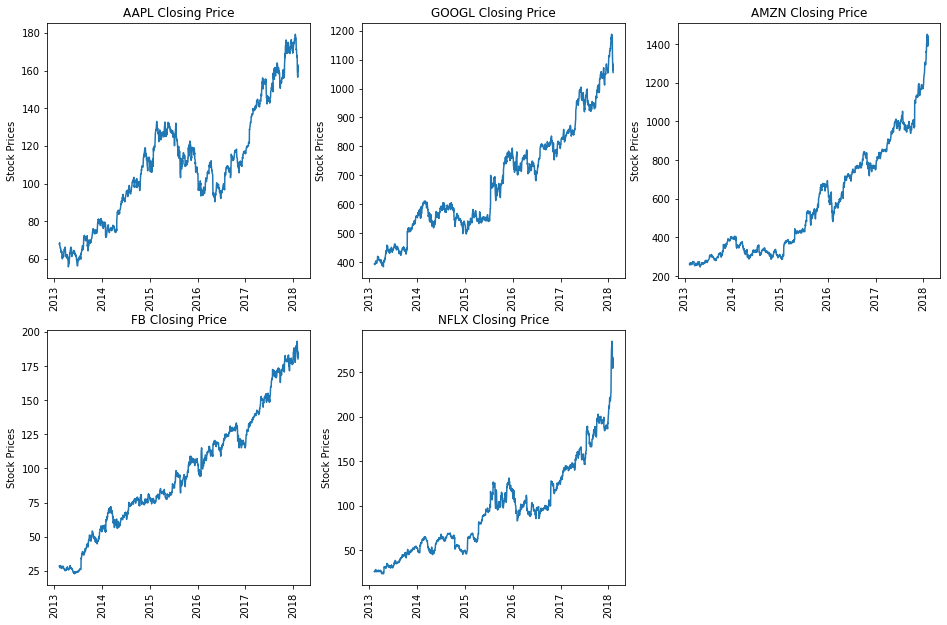

In [10]:
plt.figure(figsize=(16,16))
for i,company  in enumerate(stock_list,1):
    plt.subplot(3,3,i)
    df=all_data[all_data['Name']==company]
    plt.plot(df['date'],df['close'])
    plt.title(company + ' Closing Price')
    plt.ylabel('Stock Prices')
    
    plt.xticks(rotation='vertical')
    plt.tight_layout

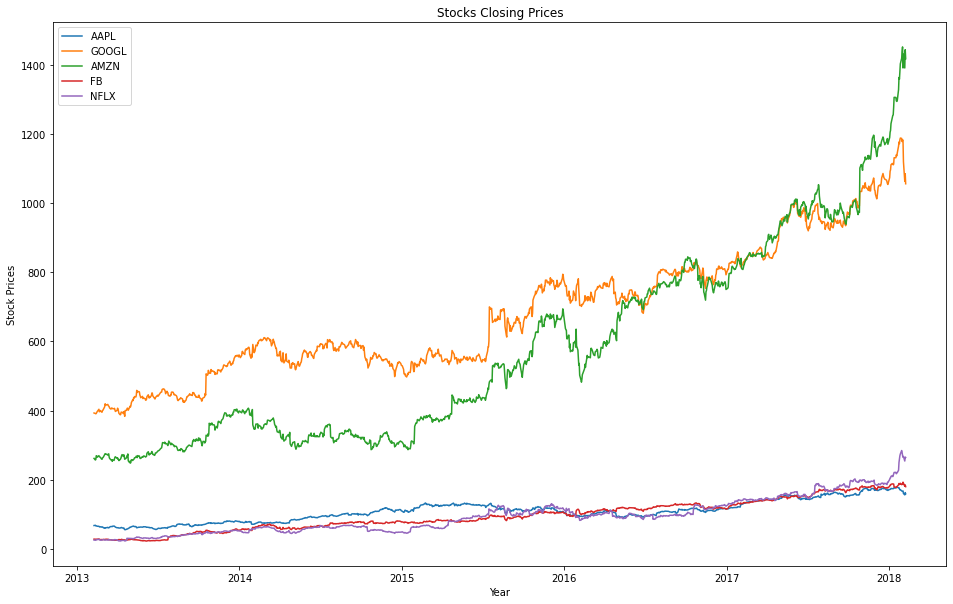

In [11]:
plt.figure(figsize=(16,10))


for i,company  in enumerate(stock_list,1):
#     plt.subplot(3,3,i)
    df=all_data[all_data['Name']==company]
    c=df.Name.unique()[0]
    plt.plot(df['date'],df['close'],label=c)
    plt.title('Stocks Closing Prices')
    plt.ylabel('Stock Prices')
    plt.xlabel('Year')
    plt.tight_layout
    plt.legend(loc='upper left')
  

In [12]:
import plotly.express as px

In [13]:
for company in stock_list:
    df=all_data[all_data['Name']==company]
    fig=px.line(df,x='date',y='volume',title=company)
    fig.show()

In [14]:
all_data.head()

date     open     high      low    close     volume  Name
0 2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1 2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2 2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3 2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
4 2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL

In [15]:
all_data['Daily_change in price']=all_data['close']-all_data['open']

In [16]:
all_data.head()

date     open     high      low    close     volume  Name  \
0 2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL   
1 2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL   
2 2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL   
3 2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL   
4 2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL   

   Daily_change in price  
0                 0.1400  
1                 0.4900  
2                -1.6586  
3                -0.0286  
4                 0.2957

In [17]:
all_data['Daily % return']=(all_data['Daily_change in price']/all_data['close'])*100

In [18]:
all_data.head()

date     open     high      low    close     volume  Name  \
0 2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL   
1 2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL   
2 2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL   
3 2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL   
4 2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL   

   Daily_change in price  Daily % return  
0                 0.1400        0.206325  
1                 0.4900        0.714688  
2                -1.6586       -2.481344  
3                -0.0286       -0.042869  
4                 0.2957        0.443624

In [19]:
for company in stock_list:
    df=all_data[all_data['Name']==company]
    fig=px.line(df,x='date',y='Daily % return',title=company)
    fig.show()

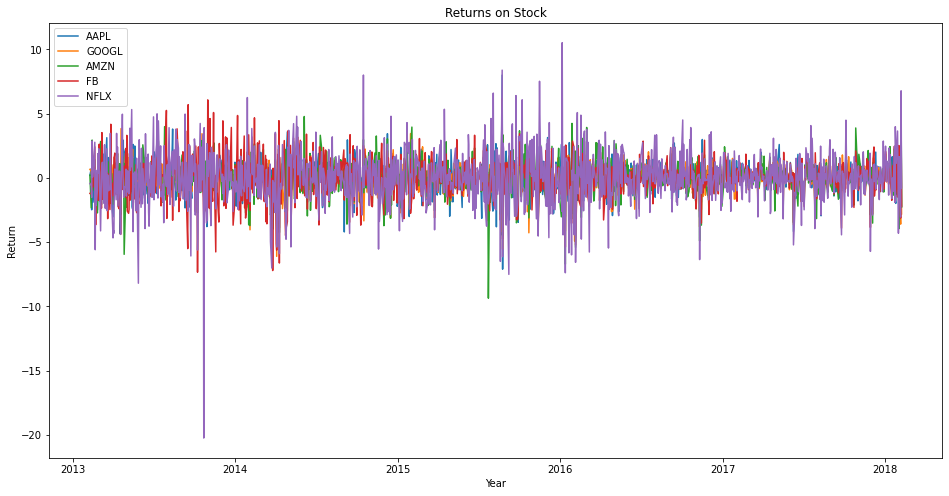

In [20]:
plt.figure(figsize=(16,8))


for i,company  in enumerate(stock_list,1):
#     plt.subplot(3,3,i)
    df=all_data[all_data['Name']==company]
    c=df.Name.unique()[0]
    plt.plot(df['date'],df['Daily % return'],label=c)
    plt.title('Returns on Stock')
    plt.ylabel('Return')
    plt.xlabel('Year')
    plt.tight_layout
    plt.legend(loc='upper left')
  

#### From the above plot it can be seen that Netflix is more volatile stock in this period with maximum and minimum return.

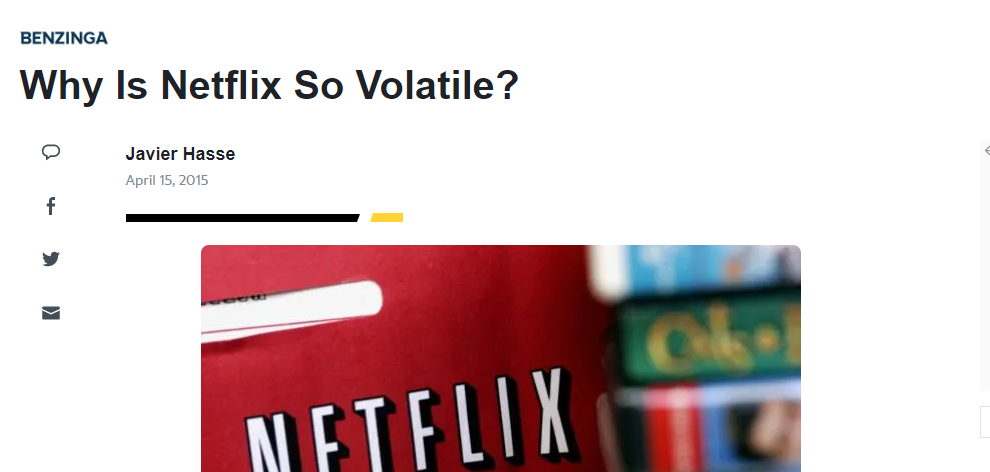

#### https://finance.yahoo.com/news/why-netflix-volatile-183628599.html

In [21]:
all_data_2=all_data

In [22]:
all_data_2.set_index('date',inplace=True)

In [23]:
all_data_2.head()

open     high      low    close     volume  Name  \
date                                                              
2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL   
2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL   
2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL   
2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL   
2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL   

            Daily_change in price  Daily % return  
date                                               
2013-02-08                 0.1400        0.206325  
2013-02-11                 0.4900        0.714688  
2013-02-12                -1.6586       -2.481344  
2013-02-13                -0.0286       -0.042869  
2013-02-14                 0.2957        0.443624

#### Resample--Convenience method for frequency conversion and resampling of time series

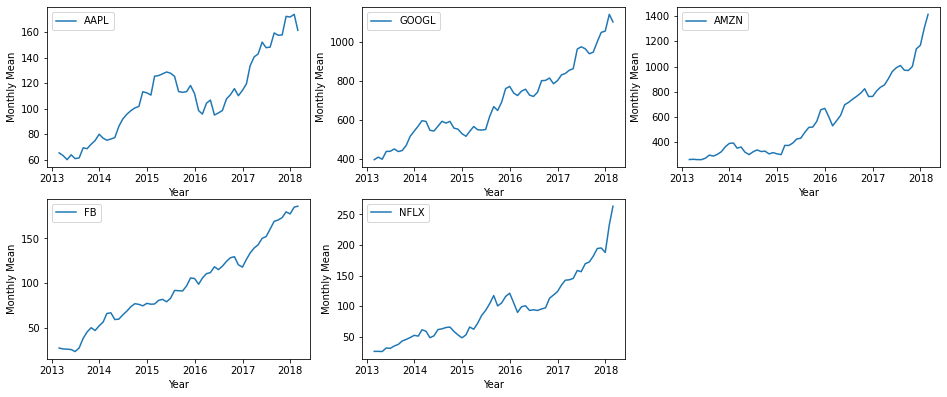

In [24]:
plt.figure(figsize=(16,10))
for i,company  in enumerate(stock_list,1):
    plt.subplot(3,3,i)
    df2=all_data_2[all_data_2['Name']==company]
    c=df2.Name.unique()[0]
    plt.plot(df2['close'].resample('M').mean(),label=c)
    plt.ylabel('Monthly Mean')
    plt.xlabel('Year')
    plt.tight_layout
    plt.legend(loc='upper left')
  


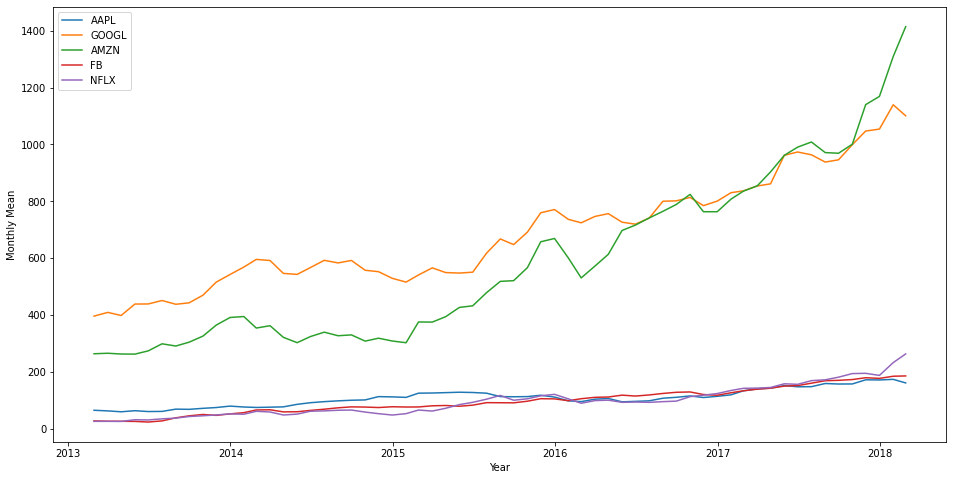

In [25]:
plt.figure(figsize=(16,8))
for i,company  in enumerate(stock_list,1):
    df2=all_data_2[all_data_2['Name']==company]
    c=df2.Name.unique()[0]
    plt.plot(df2['close'].resample('M').mean(),label=c)
    plt.ylabel('Monthly Mean')
    plt.xlabel('Year')
    plt.tight_layout
    plt.legend(loc='upper left')
  


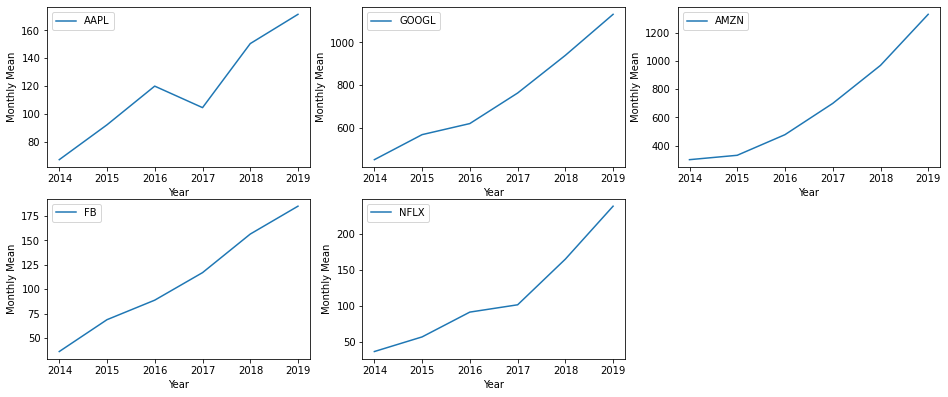

In [26]:
plt.figure(figsize=(16,10))
for i,company  in enumerate(stock_list,1):
    plt.subplot(3,3,i)
    df2=all_data_2[all_data_2['Name']==company]
    c=df2.Name.unique()[0]
#     df2['close'].resample('Y').mean().plot(kind='bar',label=c)
    plt.plot(df2['close'].resample('Y').mean(),label=c)
    plt.ylabel('Monthly Mean')
    plt.xlabel('Year')
    plt.tight_layout
    plt.legend(loc='upper left')
#     plt.xticks(rotation='vertical')
  


In [27]:
meta=pd.read_csv('FB_data.csv')
apple=pd.read_csv('AAPL_data.csv')
amazon=pd.read_csv('AMZN_data.csv')
netflix=pd.read_csv('NFLX_data.csv')
google=pd.read_csv('GOOGL_data.csv')

In [28]:
google.head()

date      open      high       low     close   volume   Name
0  2013-02-08  390.4551  393.7283  390.1698  393.0777  6031199  GOOGL
1  2013-02-11  389.5892  391.8915  387.2619  391.6012  4330781  GOOGL
2  2013-02-12  391.2659  394.3440  390.0747  390.7403  3714176  GOOGL
3  2013-02-13  390.4551  393.0677  390.3750  391.8214  2393946  GOOGL
4  2013-02-14  390.2549  394.7644  389.2739  394.3039  3466971  GOOGL

In [29]:
cor_df=pd.concat([meta['open'],apple['open'],amazon['open'],netflix['open'],google['open']],axis=1)
cor_df.columns=['Meta Open','Apple Open','Amazon Open','Netflix Open','Google Open']

In [30]:
cor_df.head()

Meta Open  Apple Open  Amazon Open  Netflix Open  Google Open
0      28.89     67.7142       261.40       25.9635     390.4551
1      28.61     68.0714       263.20       25.5685     389.5892
2      27.67     68.5014       259.19       25.8085     391.2659
3      27.36     66.7442       261.53       25.8428     390.4551
4      28.02     66.3599       267.37       26.7557     390.2549

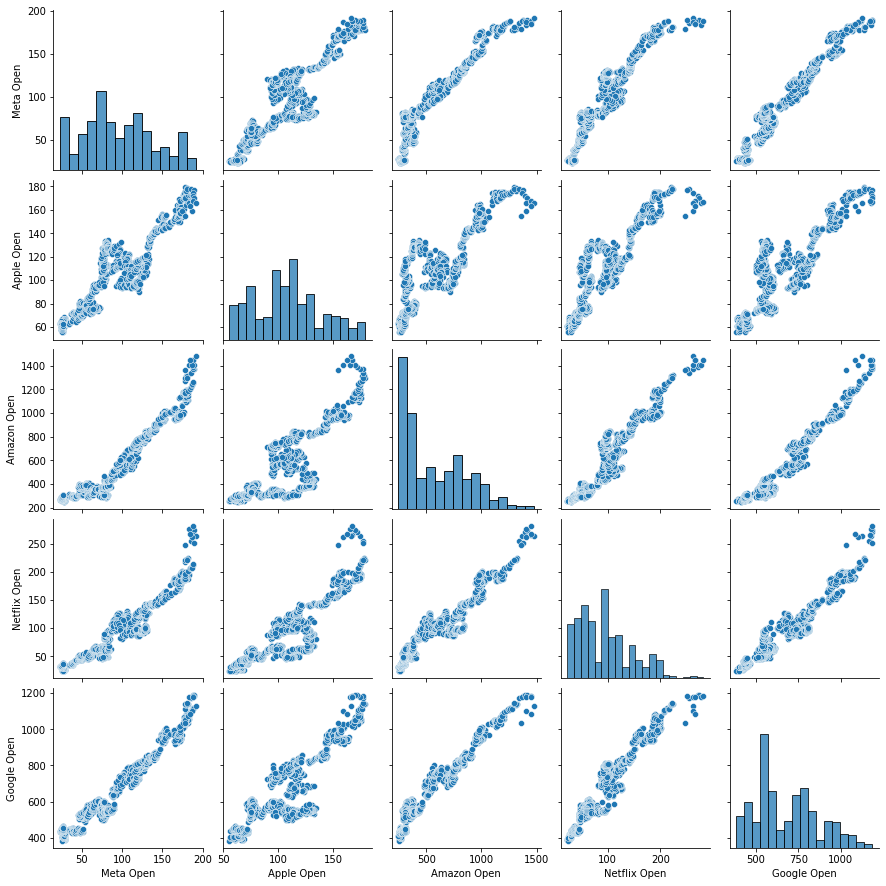

In [31]:
sns.pairplot(cor_df,palette='Blues')

<AxesSubplot:>

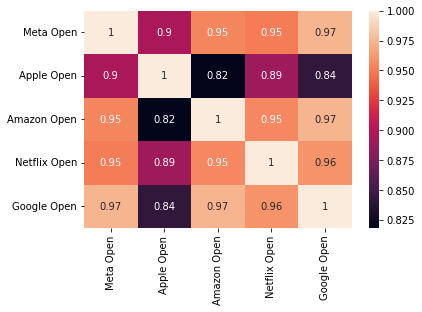

In [32]:
sns.heatmap(cor_df.corr(),annot=True)

In [33]:
change_df=pd.DataFrame()

In [34]:
change_df['meta_change']=((meta['close']-meta['open'])/meta['close'])*100
change_df['apple_change']=((apple['close']-apple['open'])/apple['close'])*100
change_df['amazon_change']=((amazon['close']-amazon['open'])/amazon['close'])*100
change_df['netflix_change']=((netflix['close']-netflix['open'])/netflix['close'])*100
change_df['google_change']=((google['close']-google['open'])/google['close'])*100

In [35]:
change_df.head()

meta_change  apple_change  amazon_change  netflix_change  google_change
0    -1.208618      0.206325       0.209964       -0.428193       0.667196
1    -1.238500      0.714688      -2.328836       -0.612683       0.513788
2    -1.096091     -2.481344      -0.189409       -1.522733      -0.134514
3     1.961838     -0.042869       2.946525        2.882397       0.348705
4     1.684211      0.443624       0.694548        0.058645       1.026873

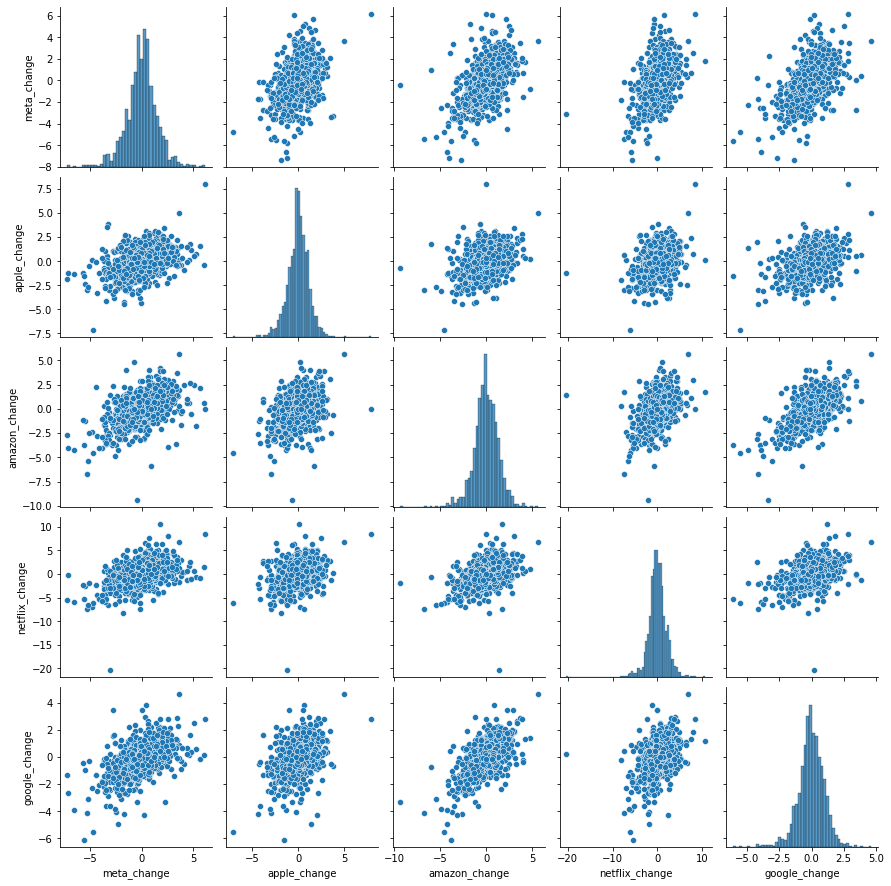

In [36]:
sns.pairplot(change_df,palette='Blues')

<AxesSubplot:>

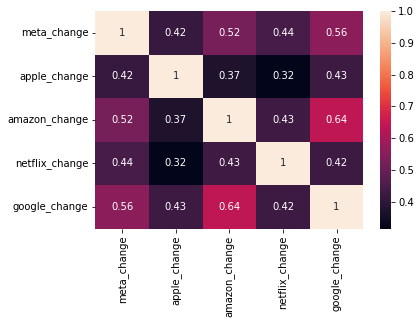

In [37]:
sns.heatmap(change_df.corr(),annot=True)

#### amazon and google are highly corelated 64%, netflix and apple are least corelated in daily percenatge change 32%

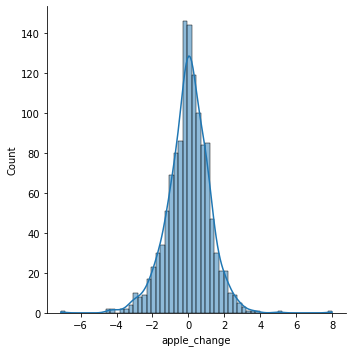

In [38]:
sns.displot(change_df['apple_change'],kde=True)


#### Its is normally distributed

In [39]:
change_df['apple_change'].std()*3  
# 99.7 of entire data will be in the 3rd standard deviation.

3.561413139426371

In [40]:
change_df['apple_change'].quantile(0.1)

-1.4246644227944307

#### In apple,90% of time the maximum loss will not cross more than 1.42%

In [41]:
change_df.describe().T

count      mean       std        min       25%       50%  \
meta_change     1259.0 -0.005020  1.544814  -7.339839 -0.801400  0.037608   
apple_change    1259.0 -0.000215  1.187138  -7.104299 -0.658021  0.042230   
amazon_change   1259.0 -0.000398  1.358679  -9.363077 -0.738341 -0.002623   
netflix_change  1259.0  0.010494  2.074742 -20.251634 -1.080091 -0.025157   
google_change   1259.0 -0.028349  1.052191  -6.107290 -0.575799 -0.004508   

                     75%        max  
meta_change     0.819780   6.163966  
apple_change    0.715427   8.000388  
amazon_change   0.852568   5.640265  
netflix_change  1.092989  10.528552  
google_change   0.624730   4.652214